In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
len(X_train[0][0])

28

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
y_train.shape

(60000,)

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

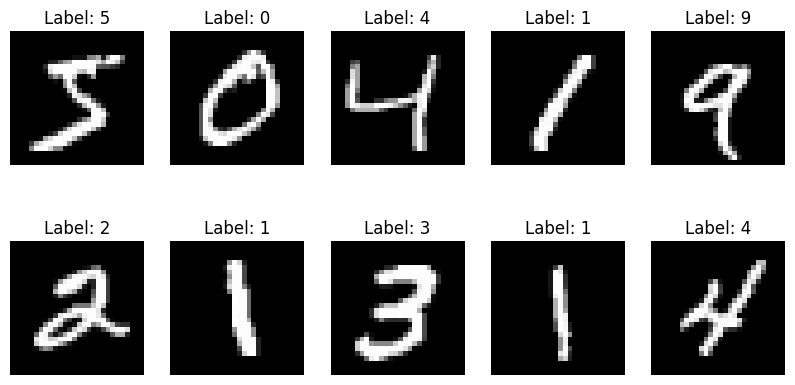

In [16]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.show()


<ipython-input-18-10c86b745f11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


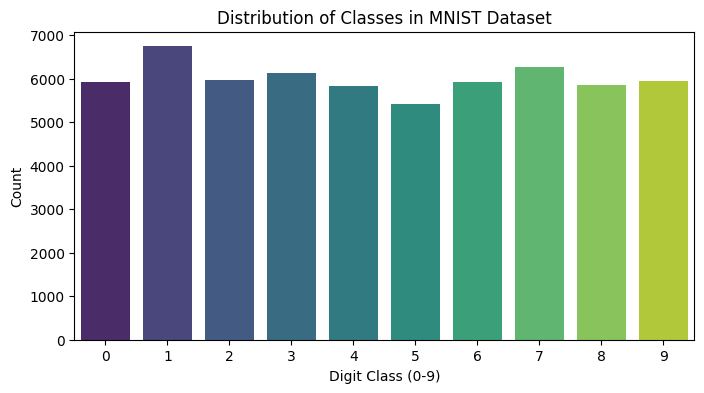

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribution of Classes in MNIST Dataset")
plt.xlabel("Digit Class (0-9)")
plt.ylabel("Count")
plt.show()

In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9106 - loss: 0.2899 - val_accuracy: 0.9850 - val_loss: 0.0429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9869 - loss: 0.0434 - val_accuracy: 0.9877 - val_loss: 0.0354
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9878 - val_loss: 0.0343
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9878 - val_loss: 0.0352
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - accuracy: 0.9963 - loss: 0.0114 - val_accuracy: 0.9915 - val_loss: 0.0271
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9904 - val_loss: 0.0331
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9971 -

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 3s - 8ms/step - accuracy: 0.9915 - loss: 0.0327

Test accuracy: 0.9915


Visualizing Training Performance

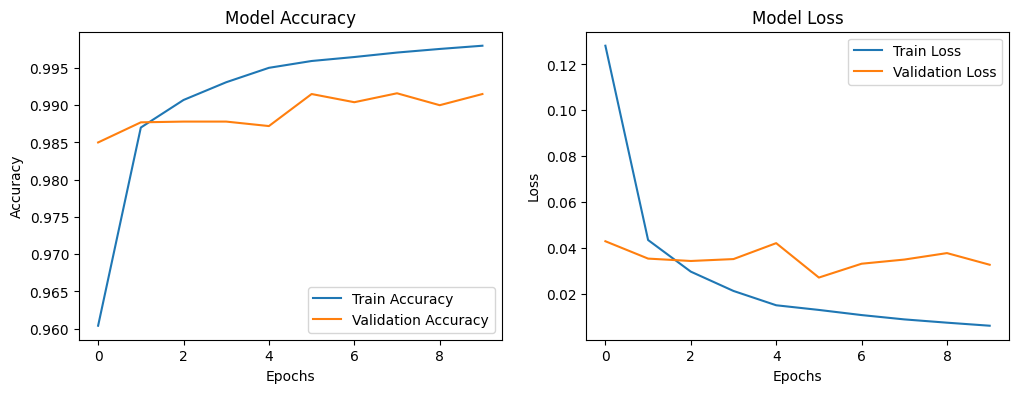

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


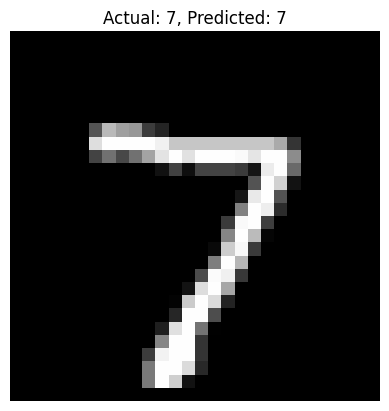

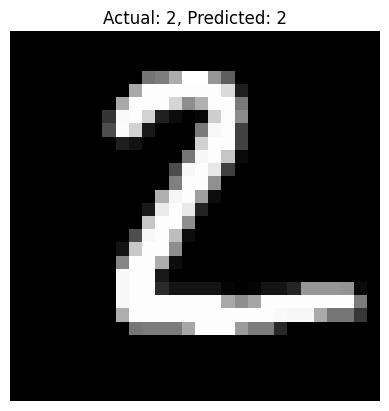

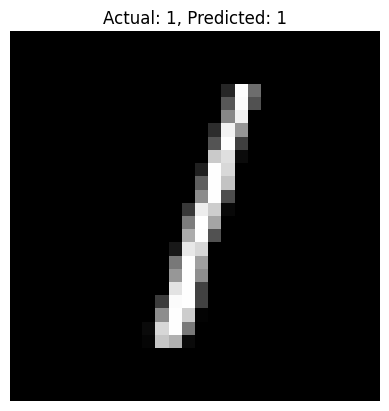

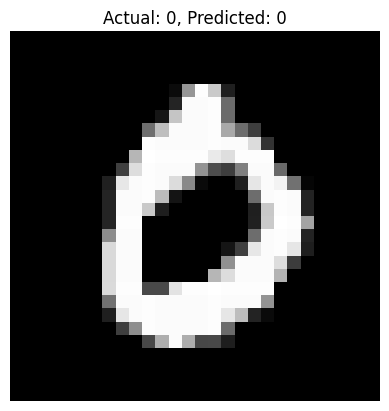

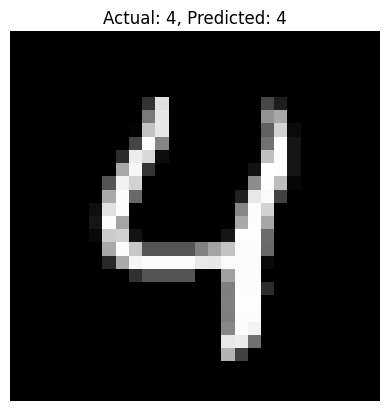

In [14]:
predictions = model.predict(X_test)

def plot_sample_predictions(index):
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[index]}, Predicted: {np.argmax(predictions[index])}")
    plt.axis('off')
    plt.show()

for i in range(5):
    plot_sample_predictions(i)
